# This Jupyter Notebook performs EDA on 'Previous Application Data'

## Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Set Jupyter to display all columns

In [2]:
pd.set_option("display.max_columns", None)

### Importing 'previous_application.csv'

In [3]:
df1 = pd.read_csv('dataset/previous_application.csv')

In [4]:
# inspecting the top 10 rows

df1.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### There are many values **XNA** in the DataFrame. Theese are NULL values. Removing them...

In [5]:
# replace XNA with Not a Number
df1.replace('XNA', np.nan, inplace=True)

### There could be columns with **NULL values**. If there are too many then they are useless for the analysis.

In [6]:
# Calculating total number of NULL values
null_col=df1.isnull().sum()
total_length = len(df1)

# Converting 'null_col' to a Pandas DataFrame
null_cols = pd.DataFrame.from_dict(null_col)

# Calculating Percentage
null_cols['NULL_Percent'] = round((null_col*100 / total_length), 1)

# Sorting in descending Order
null_cols.sort_values(by='NULL_Percent', ascending=False)

,0,NULL_Percent
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
NAME_PRODUCT_TYPE,1063666,63.7
NAME_GOODS_CATEGORY,950809,56.9
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_SELLER_INDUSTRY,855720,51.2
NAME_TYPE_SUITE,820405,49.1
NAME_CASH_LOAN_PURPOSE,677918,40.6
NFLAG_INSURED_ON_APPROVAL,673065,40.3


**RATE_INTEREST_PRIMARY** and **RATE_INTEREST_PRIVILEGED** are almost completely empty. So they can be removed

## And about other columns...

- columns starting with '**DAYS....**' can also be dropped because it presents various attributes with respect to previous application.
- But, '**DAYS_FIRST_DRAWING**' and '**DAYS_TERMINATION**' are retained to see how much immediately the person is taking a loan.
- similarly,'**NAME_TYPE_SUITE**'  which is, who accompanied ther person, can also be removed as it is useless for the analysis.
- '**SK_ID_PREV**' can be removed as identification numbers are random numbers and hence useless
- However '**SK_ID_CURR**' will be retained so that it can be used to merge with the current table
- It is irrational to reject a loan based on **WEEKDAY_APPR_PROCESS_START** or **HOUR_APPR_PROCESS_START**, so we can drop them

In [7]:
to_be_removed = ['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'SK_ID_PREV', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' ]
df1.drop(columns=to_be_removed, axis=1, inplace=True)

### FLAG_LAST_APPL_PER_CONTRACT

In the column, **FLAG_LAST_APPL_PER_CONTRACT**, the flags are 'Y' for YES and 'N' for NO. It is better to replace it with '1' for YES and '0' for NO which will enable us to do further analysis

In [8]:
df1.FLAG_LAST_APPL_PER_CONTRACT.replace('Y', 1, inplace=True)
df1.FLAG_LAST_APPL_PER_CONTRACT.replace('N', 0, inplace=True)

print(df1.FLAG_LAST_APPL_PER_CONTRACT.value_counts())

1    1661739
0       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


### SELLERPLACE_AREA

SELLERPLACE_AREA cannot be negative. So the negative values are NULL values

In [9]:
df1.SELLERPLACE_AREA.replace(-1, np.nan, inplace=True)

In [10]:
df1.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,1,1,0.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,NaN,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-37.0,0.0
1,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,1,1,NaN,NaN,Approved,-164,NaN,XAP,Repeater,NaN,Cash,x-sell,Contact center,NaN,NaN,36.0,low_action,Cash X-Sell: low,365243.0,365243.0,1.0
2,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,1,1,NaN,NaN,Approved,-301,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,NaN,12.0,high,Cash X-Sell: high,365243.0,365243.0,1.0
3,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,1,1,NaN,NaN,Approved,-512,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-177.0,1.0
4,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,1,1,NaN,Repairs,Refused,-781,Cash through the bank,HC,Repeater,NaN,Cash,walk-in,Credit and cash offices,NaN,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN
5,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,1,1,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,NaN,NaN,18.0,low_normal,Cash X-Sell: low,365243.0,-137.0,1.0
6,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,1,1,NaN,NaN,Canceled,-14,NaN,XAP,Repeater,NaN,NaN,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,Cash,NaN,NaN,NaN
7,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,1,1,NaN,NaN,Canceled,-21,NaN,XAP,Repeater,NaN,NaN,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,Cash,NaN,NaN,NaN
8,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,1,1,NaN,NaN,Canceled,-386,NaN,XAP,Repeater,NaN,NaN,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,Cash,NaN,NaN,NaN
9,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,1,1,NaN,NaN,Canceled,-57,NaN,XAP,Repeater,NaN,NaN,NaN,Credit and cash offices,NaN,NaN,NaN,NaN,Cash,NaN,NaN,NaN


### Inspecting NAME_PAYMENT_TYPE

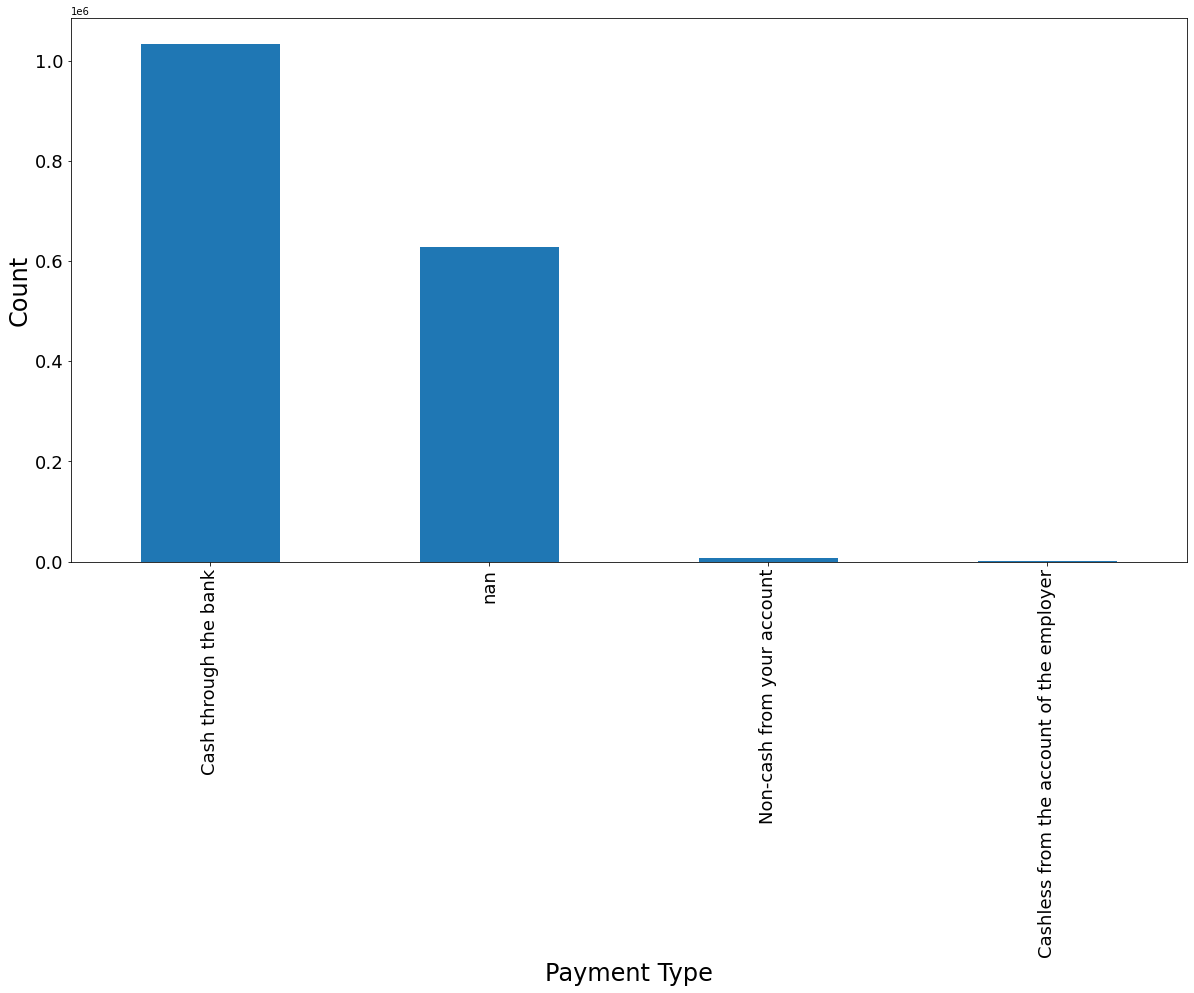

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
df1.NAME_PAYMENT_TYPE.value_counts(dropna=False).plot.bar(figsize=(20,10), fontsize=18)
plt.xlabel('Payment Type', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.show()

 It can be observed that customers prefer **Cash through bank**. Although, it can be observed that there are many NULL values. So it makes this observation more probabilistic than deterministic in nature

### Inpsecting NAME_CLIENT_TYPE

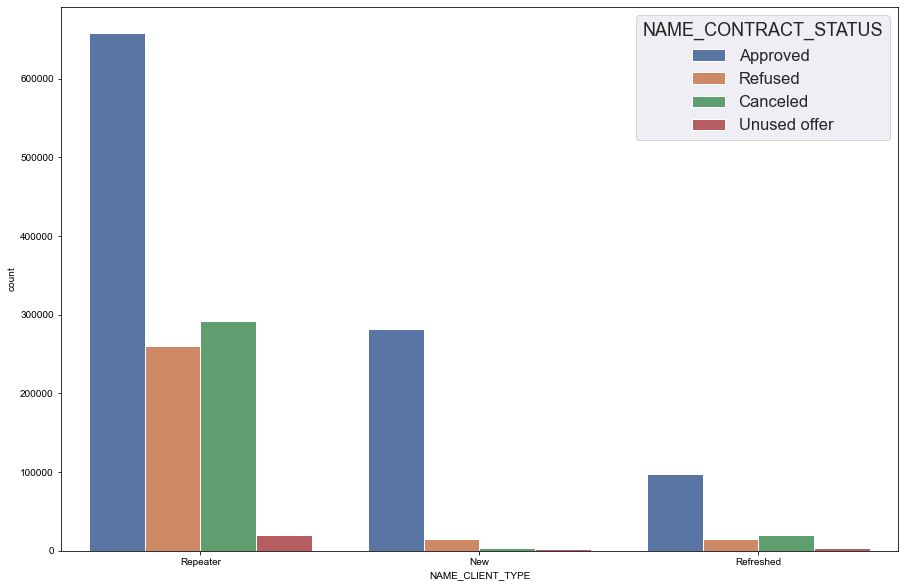

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x=df1.NAME_CLIENT_TYPE, hue=df1.NAME_CONTRACT_STATUS)
plt.show()

- It can be oberved that there are a many repeating customers. But they also tend to cancel thier loans. many loans are also refused by the financial institutions. 
- New customers look more profitable as Approval rate is high and cancellation and refusal rates are low

### Inspecting NAME_PRODUCT_TYPE

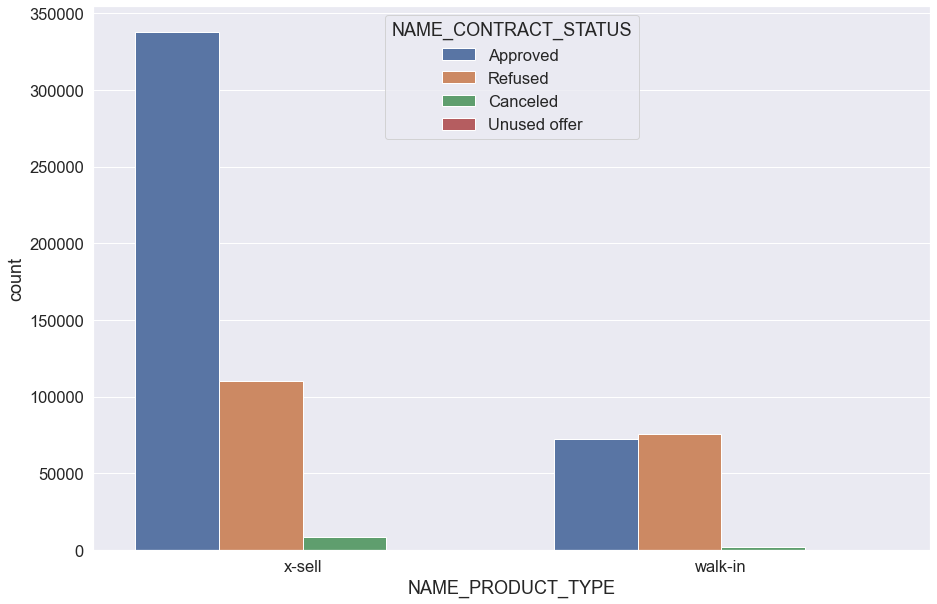

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x=df1.NAME_PRODUCT_TYPE, hue=df1.NAME_CONTRACT_STATUS)
plt.show()

It can be observed that x-sell the approval rate is high than walk-in. therefore the financial institution should direct its efforts on x-sell

### Inspecting influence of Sellerplace area on contract status

Number of Data points with more than 1M SELLERPLACE_AREA: 5


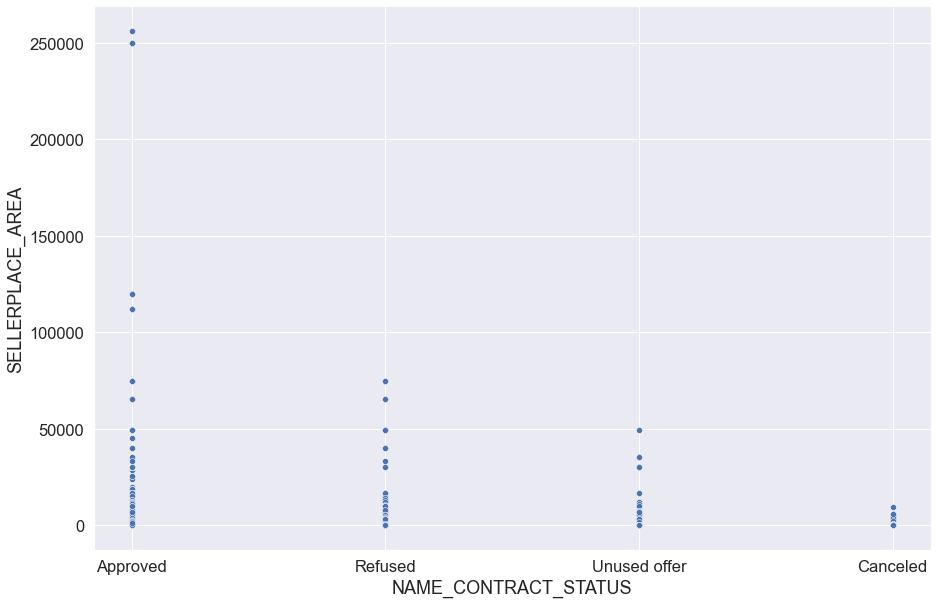

In [14]:
print('Number of Data points with more than 1M SELLERPLACE_AREA:', len(df1[df1.SELLERPLACE_AREA > 1000000]))
# Since they are very less, we will exclude them while drawing the scatter plot. Otherwise the plot appears tiny

fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.scatterplot(data=df1[df1.SELLERPLACE_AREA < 1000000], x='NAME_CONTRACT_STATUS', y='SELLERPLACE_AREA')
plt.show()

There are no datapoints corresponding to cancelled loans and higher sellerplace area. This means that customers do not cancel thier loans in larger financial institutions

### Inspecting influence of Goods Category

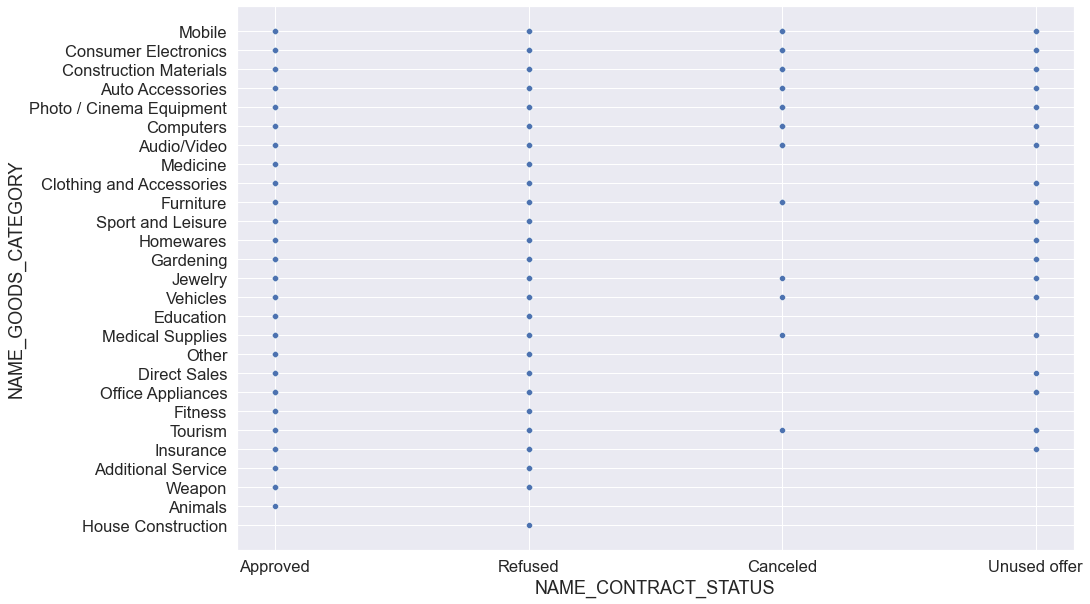

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.scatterplot(data=df1, x='NAME_CONTRACT_STATUS', y='NAME_GOODS_CATEGORY')
plt.show()

It can be observed that for animals the loan was always approved and for House Construction it was always refused by the company

### Inspecting Contract types

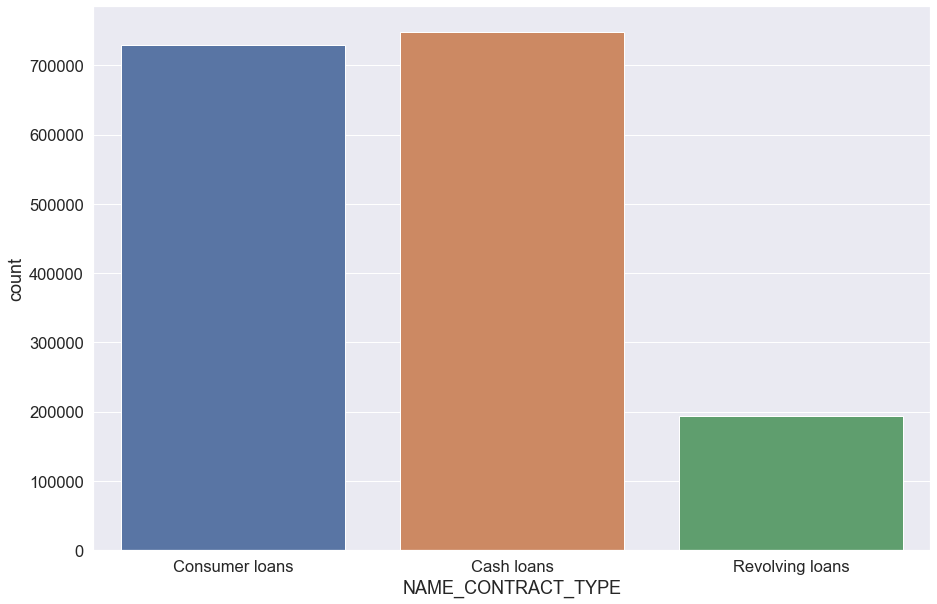

In [16]:
# fig, ax = plt.subplots(figsize=(20,10))
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x=df1.NAME_CONTRACT_TYPE)
# df1.NAME_CONTRACT_TYPE.value_counts().plot.barh()
plt.show()

 It is observed that Customers don't prefer the Revolving loan

### Why are loans getting refused?

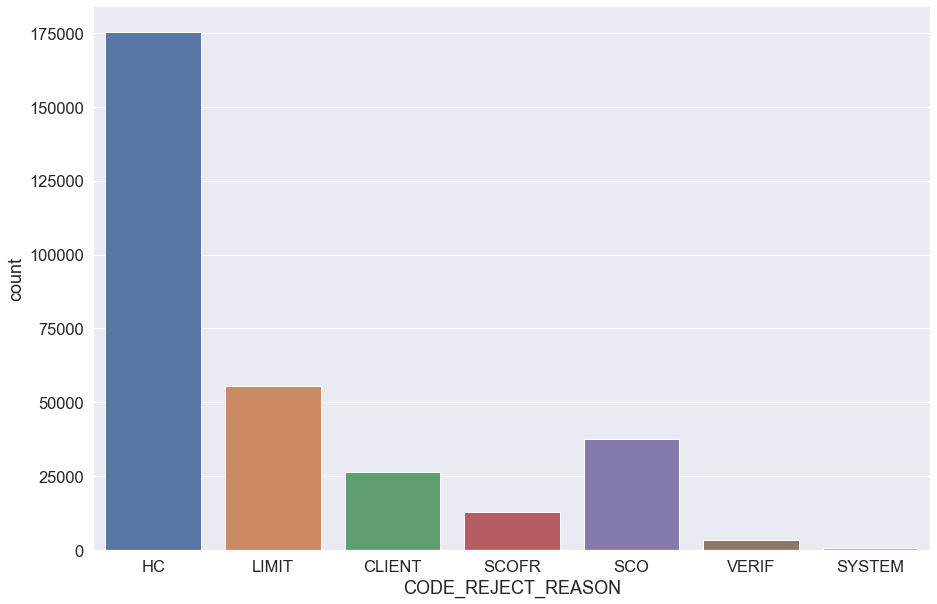

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x=df1.CODE_REJECT_REASON[df1.CODE_REJECT_REASON != 'XAP'])
plt.show()

Financial Institutions always mention **HC** as the most common reason for rejecting loan

### Why are customers taking loans?

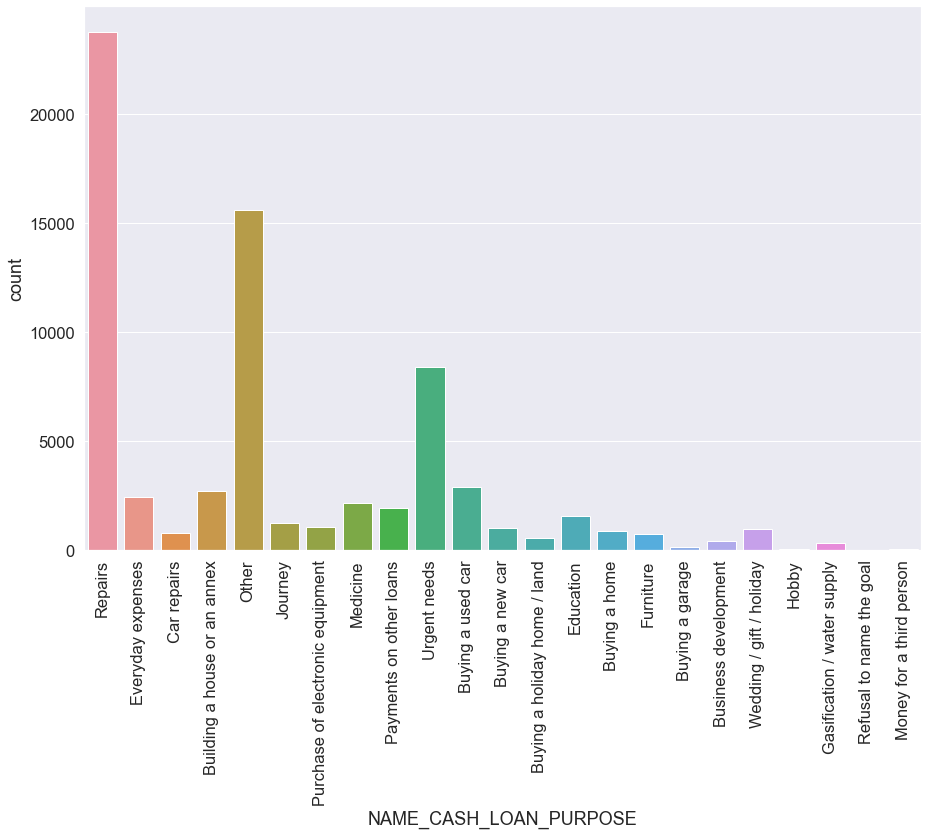

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.countplot(x=df1.NAME_CASH_LOAN_PURPOSE[df1.NAME_CASH_LOAN_PURPOSE != 'XAP'])
plt.xticks(rotation=90)
plt.show()

Repairs, Others and Urgent needs are the most common loan purposes

### Effect of Sellerplace area on purpose of loan?

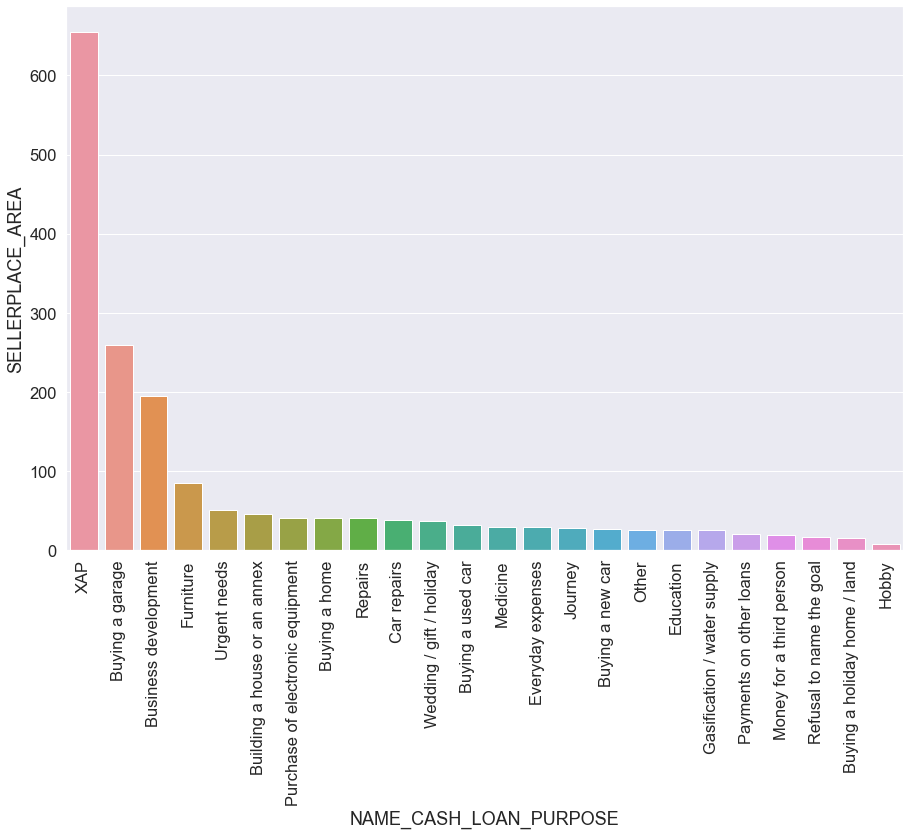

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale = 1.5)
# df1[['SELLERPLACE_AREA', 'NAME_CASH_LOAN_PURPOSE']].groupby(by=['NAME_CASH_LOAN_PURPOSE']).mean().plot.barh()

df_2 = df1.groupby('NAME_CASH_LOAN_PURPOSE').mean()

df_2.reset_index(inplace=True)
df_2.sort_values(by='SELLERPLACE_AREA', inplace=True, ascending=False)
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='SELLERPLACE_AREA', data=df_2)
plt.xticks(rotation=90)
plt.show()

People with **XAP**, **Buying a Garage** and **Business Development** are more likely to approach a bank of larger size

### Effect of amounts on Contract Status

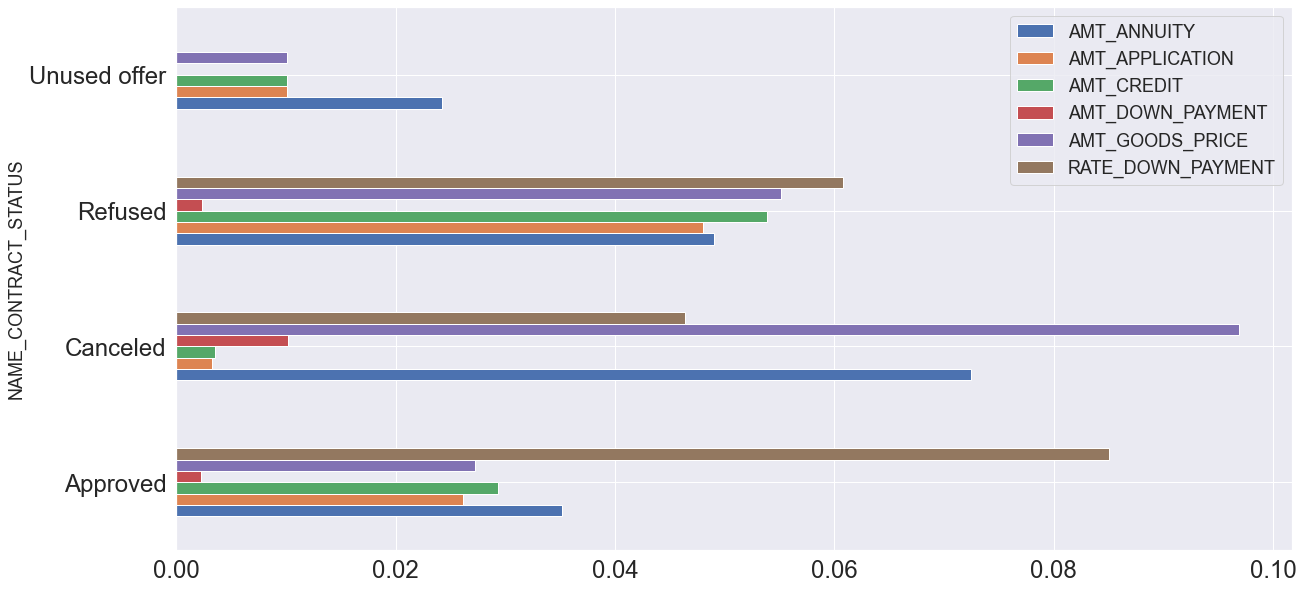

In [22]:
# Writing a Normalising function :
def normalize_column(values):
  min = np.min(values)
  max = np.max(values)
  norm = (values - min)/(max-min) 
  return(pd.DataFrame(norm))

# Collecting Numerical values and normalising value
normalised_data = normalize_column(df1[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT']])
normalised_data['NAME_CONTRACT_STATUS'] = df1.NAME_CONTRACT_STATUS

normalised_data.groupby(by='NAME_CONTRACT_STATUS').mean().plot.barh(figsize=(20,10), fontsize=24)
plt.legend(bbox_to_anchor =(1, 1), fontsize=18)
plt.show()

Customers tend to cancel thier loans when they are not getting a good amt_application / amt_credit on amt_goods_price,i.e, when their ratio is the highest

### Inspecting Insurace Flags

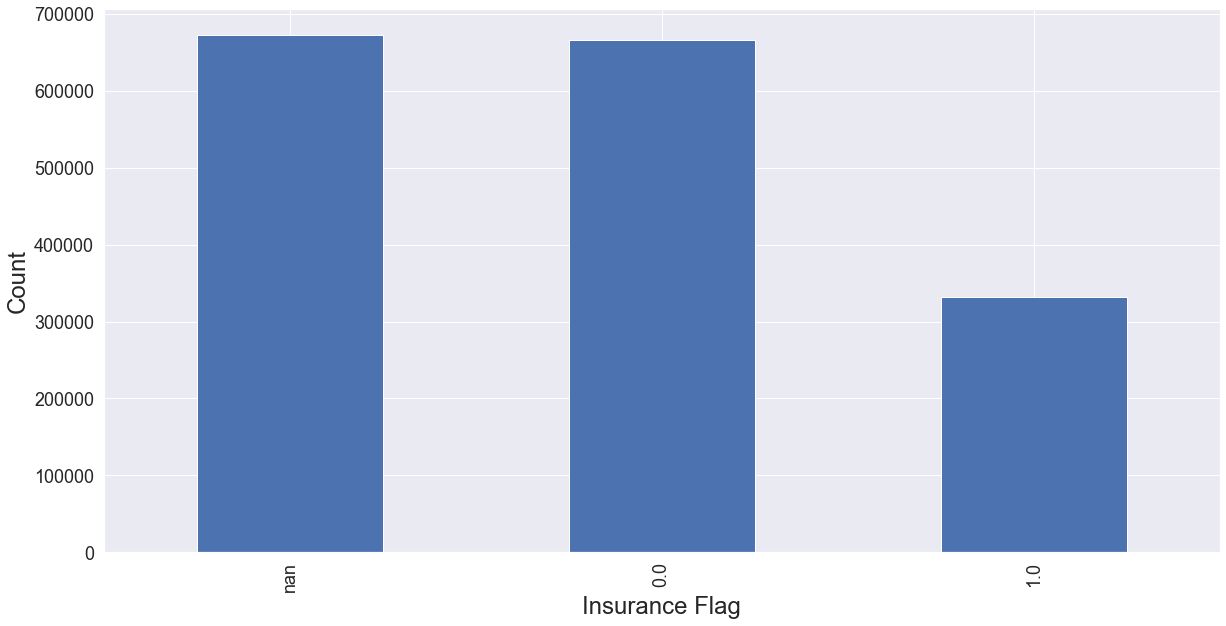

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
df1.NFLAG_INSURED_ON_APPROVAL.value_counts(dropna=False).plot.bar(figsize=(20,10), fontsize=18)
plt.xlabel('Insurance Flag', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.show()

Despite the fact that there are mny NULL values, the ratio of Insurance-yes and Insurance-no is high. So it can be concluded that many did not request insurance on the loan

### Inspecting relationsships between the numerical columns

In [ ]:
the_pair = df1[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_STATUS']]
sns.pairplot(the_pair)
plt.xticks(rotation=90)
plt.show()

- obviously there is a strong relation between **Amount of the Goods Price** and **Amount in application** because the customer wants a larget loan to buy a more expensive product
- An inverse relationship can be observed between **Down payment amount** and **Annuity amount**, i.e., if either one of them is high then the other one is lower